In [ ]:
'''
URJC / GIA / Aprendizaje Automático 1 / Curso 23-24
alfredo.cuesta@urjc.es
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

plt.rcParams['figure.figsize']=(5,5)
np.set_printoptions(precision=2)
pd.set_option("display.precision", 4)
seed = 1460
np.random.seed(seed)

# Clustering jerárquico (Dendrogramas)



<small>
<b> Dendro </b> viene del griego clásico y significa <i>árbol</i>
</small>

Una manera de NO tener que decidir de antemano cuántos clusters queremos crear, es utilizar la técnica de **Clustering jerárquico**.

Esta técnica comienza asignando un cluster diferente a cada ejemplo del conjunto de datos.
Después los clusters se agrupan entre sí por proximidad, formando otros más grandes.
De esta manera, se crea un árbol como el mostrado en la Figura de la celda siguiente; en el que podemos seleccionar por donde cortar una vez hemos terminado.


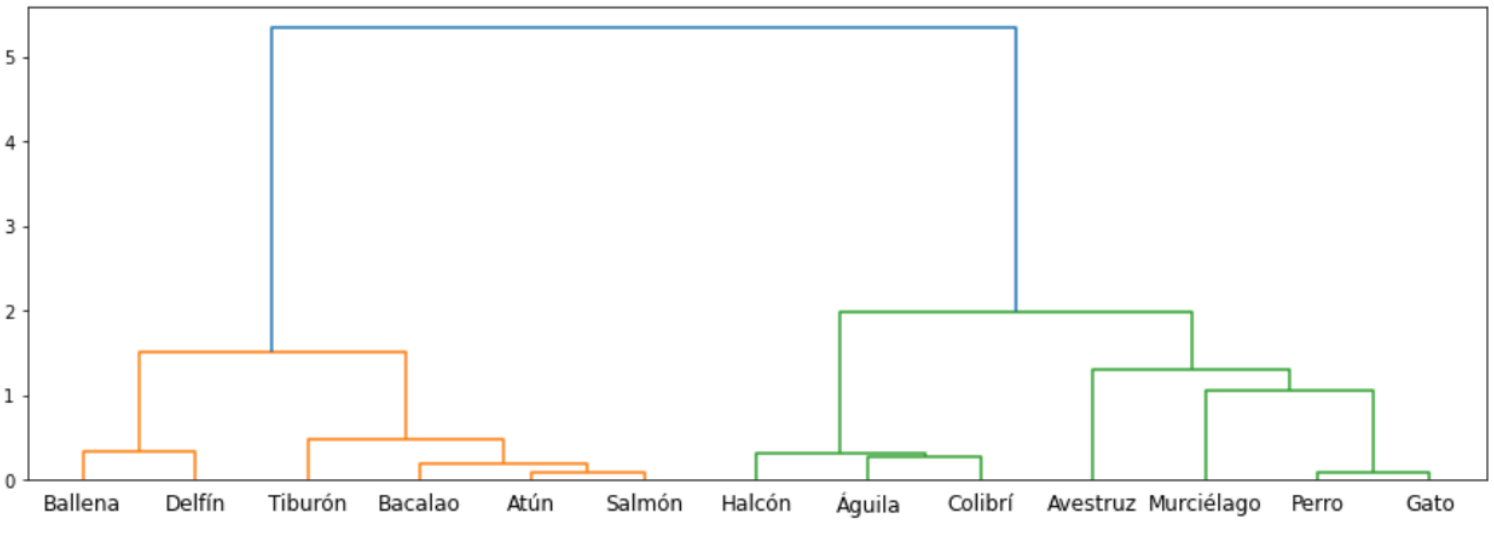


Si, por ejemplo, eliminamos la línea azul obtenemos 2 clusters.

Si a continuación cortamos en dos el grupo verde, tendremos 3: el grupo naranja, el verde de la izquierda y el verde de la derecha.

Y así sucesivamente hasta el límite en el que recuperamos un cluster por cada ejemplo (que es como habíamos empezado).


La Figura de arriba es solo un ejemplo de lo que vamos a lograr.

Para hacer clustering, evidentemente, necesitamos que cada ejemplo venga representado por un vector de características.

El algoritmo para crear un dendrograma es el siguiente:

1. Crear un cluster para cada ejemplo.<br> Por tanto si hay $N$ ejemplos, comenzamos con $N$ clusters de tamaño 1.
2. Crear una tabla con las distancias entre cada par de clusters posibles.
3. Localizar la fila y columna que dan lugar al número más bajo.<br>
   Este cruce significa que la fila y columna son los dos elementos más cercanos en ese momento.
4. Crear un nuevo cluster agrupando la fila y la columna localizadas <br>
   Después se borran la fila y la columna de la tabla y se añade el nuevo cluster como una nueva fila y una nueva columna.
5. Volver a 2. y repetir todo hasta que ya solo haya 1 único cluster que agrupa todos los ejemplos.

## Ejemplo

En la primera tabla de abajo a la izquierda se muestran las distancias que hay entre cada par de ejemplos.
> <small>Como la distancia es simétrica y cero cuando el origen y el destino coinciden, sólo se muestra la mitad inferior a la diagonal principal</small>

Después, a la derecha se muestra el primer cluster que se obtiene con los dos ejemplos más próximos.

A partir de ese momento la formación de clusters se rige por la distancia de un ejemplo a un cluster; en este caso definida como la distancia entre dicho ejemplo y el ejemplo más cercano dentro del cluster.

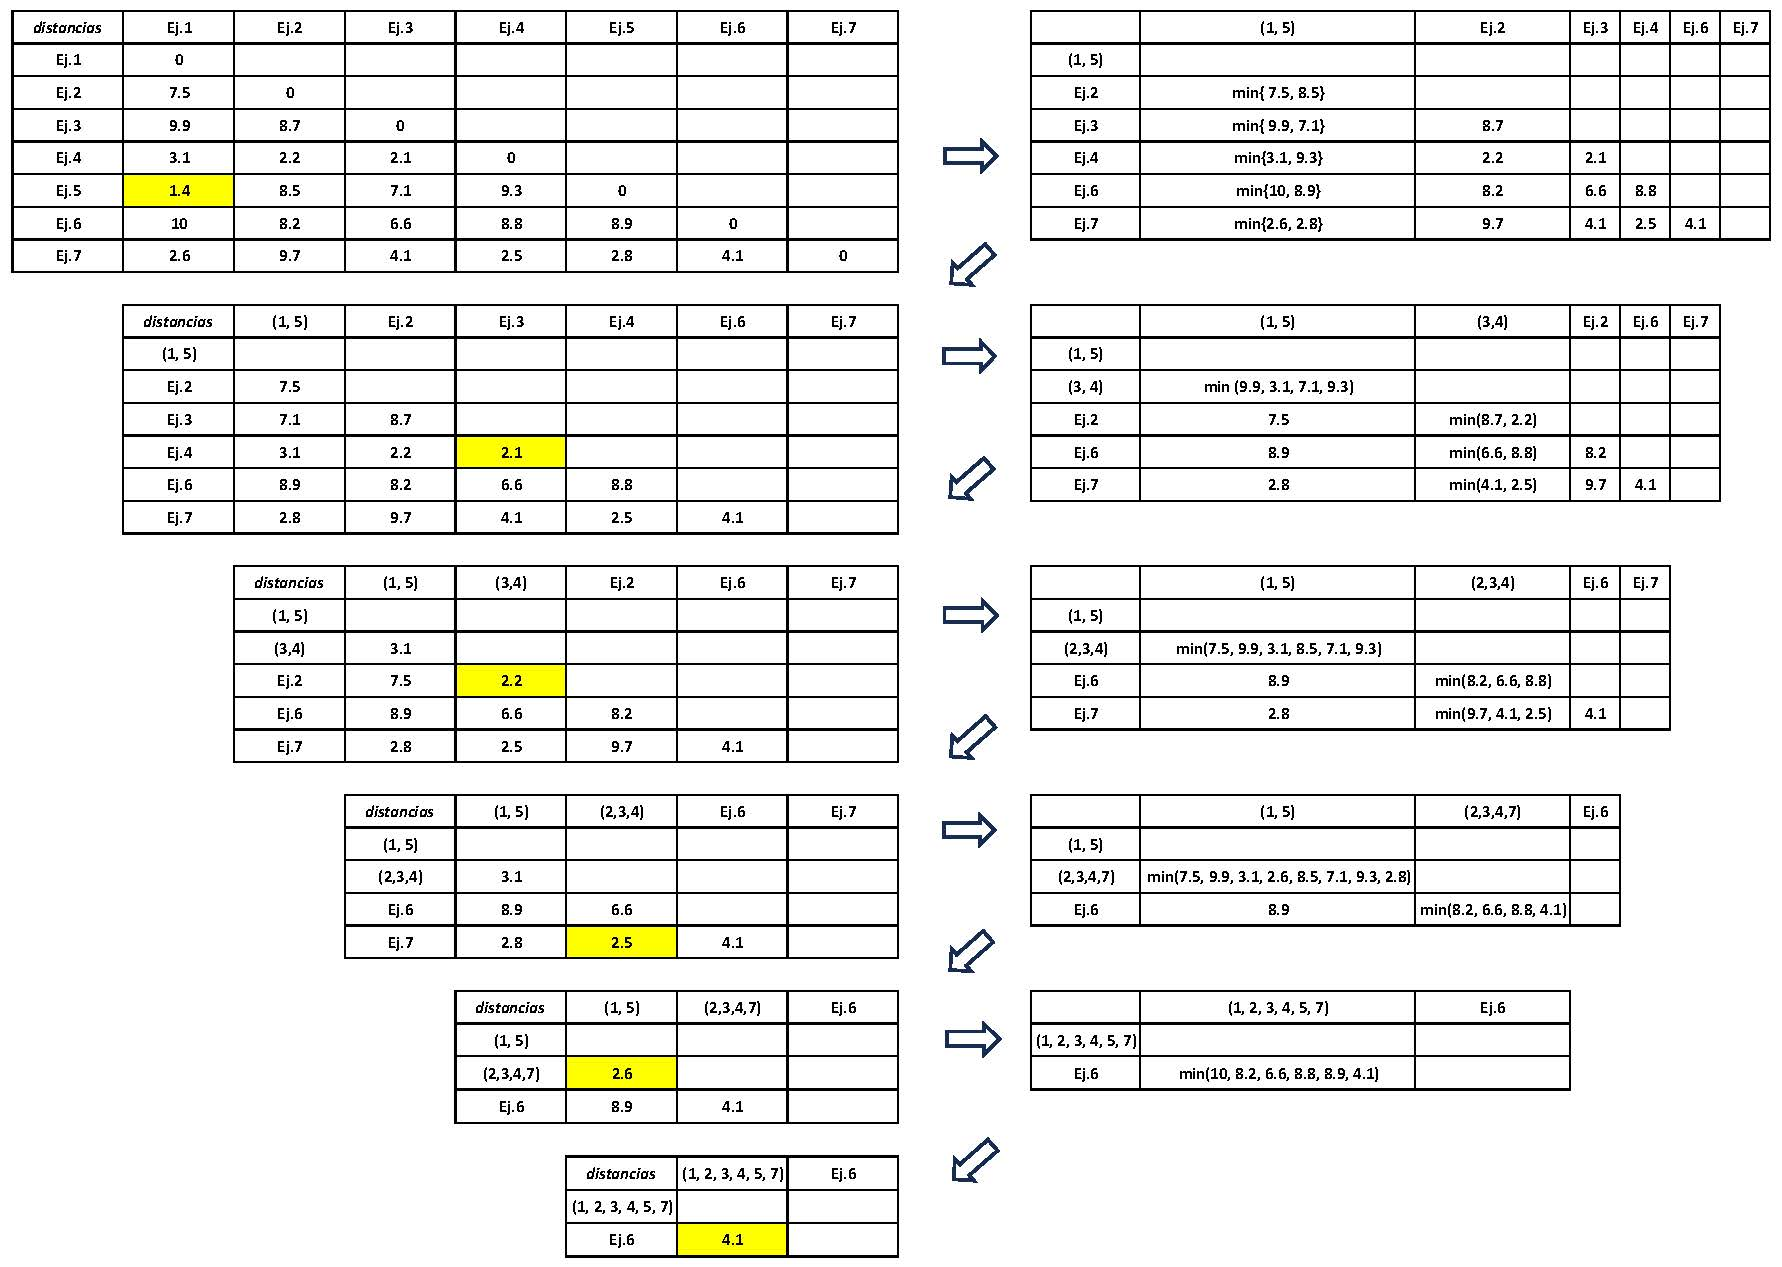

Finalmente podemos dibujar el dendrograma representando las uniones de los ejemplos según se fueron obteniendo y, en el eje vertical, la distancia a la que se encuentran.

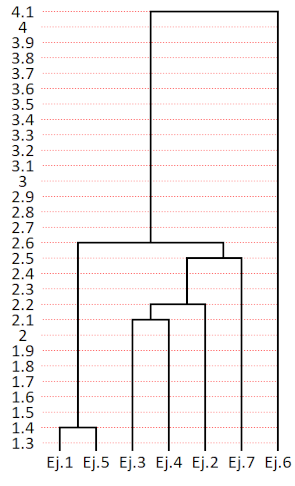

<td bgcolor="yellow">
<b> IMPORTANTE </b>
</td>

En la figura se puede observar que se utiliza el **min** para calcular la distancia entre dos clusters

Se puede redefinir esta distancia de varias maneras. Las más habituales son:
- la distancia que hay entre los dos ejemplos más próximos, uno de cada cluster obviamente; denominado en inglés **single linkage**.
- la distancia que hay entre lod dos ejemplos más alejados, también uno de cada cluster obviamente, denominado **complete linkage**.
- la distancia promedio que hay entre cada par de ejemplos, también uno de cada cluster obviamente, denominado **average linkage**.
- la distancia entre centroides, denominado **centroid linkage**.

## Ejemplo con código

En este ejemplo utilizaremos el conjunto de datos de Vino, que se puede cargar directamente desde scikit-learn con `load_wine()`.

Este conjunto de datos contiene tres tipos de vino, etiquetados como {0, 1, 2} y 13 características que se corresponden a diferentes compuestos que aparecen en el vino en menor o mayor cantidad.

In [ ]:
data = load_wine()
data = data['data']

Hay dos modos de hacer un clustering jerárquico:
- con Scipy: usando `linkage` y `dendrogram`
- con Scikit-Learn: usando `AgglomerativeClustering`

Con **Scipy** podemos dibujar el dendrograma, pero la información que devuelve no es muy útil a nivel computacional

Podemos elegir como definir la distancia entre dos clusters entre:
> _single, &nbsp; complete, &nbsp; average, &nbsp; weighted, &nbsp; centroid, &nbsp; median, &nbsp; ward_<br>
[Sus expresiones se encuentran aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)

y también podemos elegir la función distancia entre:
> _braycurtis, &nbsp; canberra, &nbsp; chebyshev, &nbsp; cityblock, &nbsp; correlation, &nbsp; cosine, &nbsp; dice, &nbsp; euclidean, &nbsp; hamming, &nbsp; jaccard, &nbsp; jensenshannon, &nbsp; kulczynski1, &nbsp; mahalanobis, &nbsp; matching, &nbsp; minkowski, &nbsp; rogerstanimoto, &nbsp; russellrao, &nbsp; seuclidean, &nbsp; sokalmichener, &nbsp; sokalsneath, &nbsp; sqeuclidean, &nbsp; yule_<br>
[Sus expresiones se encuentran aquí](https://https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)

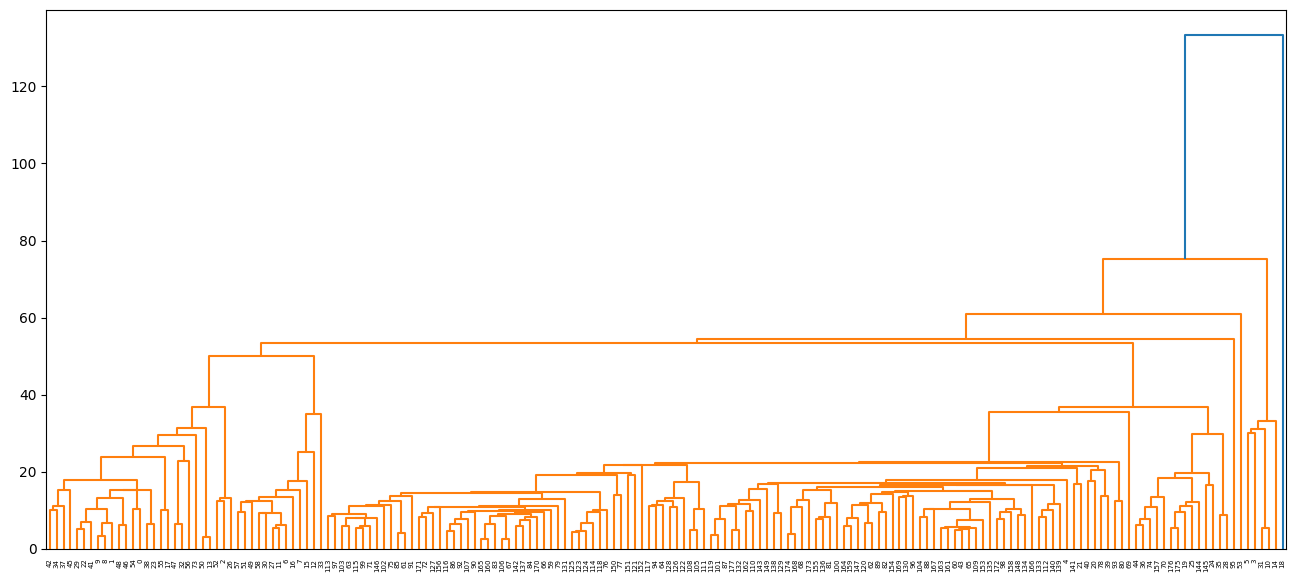

In [ ]:
#-- Ejecutamos el algormitmo

method = 'single'
distance = 'euclidean'

linked = linkage(data, method=method, metric=distance)

#-- Pintamos el dendrograma

plt.figure(figsize=(16, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


Con **Scikit-Learn** tenemos la ventaja de poder almacenar el clustering en un objeto que, entre sus atributos, contiene `labels_` para ver que grupo asigna a cada ejemplo dado.

In [ ]:
n_clusters = 3
metric = 'euclidean'
linkage='ward'

clustering = AgglomerativeClustering(n_clusters = n_clusters)
clustering.fit(data)
clustering.__dict__

{'n_clusters': 3,
 'distance_threshold': None,
 'memory': None,
 'connectivity': None,
 'compute_full_tree': 'auto',
 'linkage': 'ward',
 'affinity': 'deprecated',
 'metric': None,
 'compute_distances': False,
 'n_features_in_': 13,
 '_metric': 'euclidean',
 'children_': array([[160, 165],
        [ 67, 106],
        [ 13,  50],
        [  8,   9],
        [101, 119],
        [168, 174],
        [ 61,  85],
        [123, 125],
        [124, 185],
        [ 86, 116],
        [ 43,  60],
        [132, 177],
        [105, 108],
        [ 22,  29],
        [ 11,  27],
        [ 99, 115],
        [175, 176],
        [ 65, 109],
        [ 10,  31],
        [161, 163],
        [137, 142],
        [159, 164],
        [ 63, 103],
        [ 36,  44],
        [ 46,  48],
        [ 23,  38],
        [ 32,  47],
        [ 62, 120],
        [ 83, 178],
        [ 98, 172],
        [136, 155],
        [ 71, 193],
        [114, 186],
        [112, 133],
        [ 72, 171],
        [  1, 181],
        [

# Ejercicios

Dada la tabla de distancias entre ejemplos
$$
\begin{array}{|l|r|r|r|r|r|}
\hline
{\rm dist}. & Ej.1 & Ej.2 & Ej.3 & Ej.4 & Ej.5 \\
\hline
Ej.1 &    &    &    &   &  \\ \hline
Ej.2 & 12 &    &    &   &  \\ \hline
Ej.3 & 6  & 9  &    &   &  \\ \hline
Ej.4 & 5  & 2  & 11 &   &  \\ \hline
Ej.5 & 1  & 10 & 7  & 3 &  \\ \hline
\end{array}
$$

realiza el dendrograma completo con lápiz y papel con el método _single linkage_.

Después comprueba los resultados con código.

Prueba a modificar el modo de medir la distancia entre clusters.

Prueba diferentes maneras de calcular la distancia entre clusters y diferentes métricas de distancia con los códigos dados en este cuaderno.